In [ ]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
dataset=pd.read_csv('/content/Social_Network_Ads (2).csv')

In [ ]:
dataset.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
from sklearn import preprocessing

col_cat = ['Gender']

label_encoder = preprocessing.LabelEncoder()

for col in col_cat:
 dataset[col]=label_encoder.fit_transform(dataset[col])

In [ ]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [ ]:
X=dataset.iloc[:,[1,2,3]].values
y =dataset.iloc[:,-1].values

In [ ]:
X.shape

(400, 3)

In [ ]:
y.shape

(400,)

In [ ]:
X[:5]

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       [    0,    27, 57000],
       [    1,    19, 76000]])

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

 random_state is used to set a seed for a random generator so that you always get the same result, and the most used value for this is 42.

In [ ]:
X_train.shape

(320, 3)

In [ ]:
X_test.shape

(80, 3)

In [ ]:
y_train.shape

(320,)

In [ ]:
y_test.shape

(80,)

# Feature Scaling
Feature scaling is the final step of data preprocessing in machine learning. It is a technique to standardize the independent variables of the dataset in a specific range. In feature scaling, we put our variables in the same range and in the same scale so that no any variable dominate the other variable.


---


As we can see, the age and salary column values are not on the same scale. A machine learning model is based on Euclidean distance, and if we do not scale the variable, then it will cause some issue in our machine learning model.

---

There are two ways to perform feature scaling in machine learning:
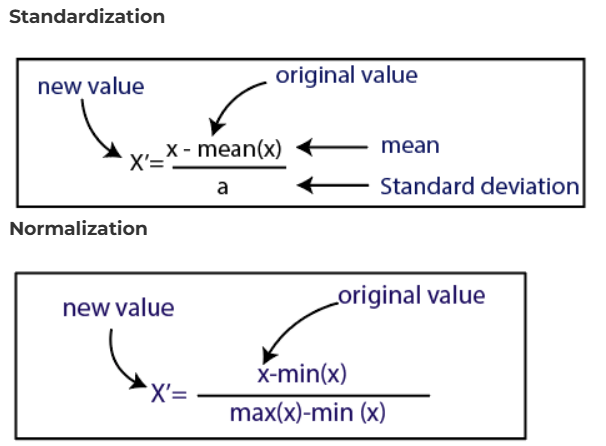

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Why use `fit_transform` on `x_train` but only `transform` on `x_test`?

#### **1. `fit_transform(x_train)`**
- Computes the **mean** and **standard deviation** from `x_train`.
- Applies the transformation using these computed values.

#### **2. `transform(x_test)`**
- Applies the transformation using the **same** mean and standard deviation computed from `x_train`.
- Ensures test data is scaled in the **same way** as training data.

#### **Why not `fit_transform(x_test)`?**
- If we call `fit_transform(x_test)`, it would **recompute** a new mean and standard deviation based only on `x_test`, causing:
  - **Data leakage** (test data influences scaling parameters).
  - **Inconsistent scaling** (train and test data might have different distributions).



In [ ]:
X_train[:5]

array([[ 1.02532046,  1.92295008,  2.14601566],
       [-0.97530483,  2.02016082,  0.3787193 ],
       [-0.97530483, -1.3822153 , -0.4324987 ],
       [-0.97530483, -1.18779381, -1.01194013],
       [-0.97530483,  1.92295008, -0.92502392]])

In [ ]:
X_test[:3]

array([[ 1.02532046, -0.79895082,  0.49460758],
       [-0.97530483, -0.02126485, -0.57735906],
       [ 1.02532046, -0.31289709,  0.14694273]])

# model training

In [ ]:
from  sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred, y_test

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1]))

# Understanding Confusion Matrix, Precision, Recall, and F1-score

When evaluating a machine learning model, we use different metrics to measure performance. Here’s a breakdown:

---

## 1. Confusion Matrix
A **confusion matrix** is a table used to evaluate classification models. It compares actual vs. predicted labels.

| Actual / Predicted | Predicted Positive (1) | Predicted Negative (0) |
|--------------------|----------------------|----------------------|
| **Actual Positive (1)**  | True Positive (TP) | False Negative (FN) |
| **Actual Negative (0)**  | False Positive (FP) | True Negative (TN) |

- **True Positive (TP)** → Correctly predicted positive cases.  
- **False Positive (FP)** → Incorrectly predicted as positive.  
- **False Negative (FN)** → Incorrectly predicted as negative.  
- **True Negative (TN)** → Correctly predicted negative cases.  

---

## 2. Accuracy
Accuracy measures how often the model is correct:

\[
 Accuracy  = \frac{TP + TN}{TP + TN + FP + FN}
\]

🔹 **Use case:** When class distribution is balanced.

---

## 3. Precision
Precision tells us **how many of the predicted positives are actually correct**:

\[
\text{Precision} = \frac{TP}{TP + FP}
\]

🔹 **Use case:** When **false positives** need to be minimized (e.g., spam detection, fraud detection).

---

## 4. Recall (Sensitivity)
Recall measures **how many actual positives were correctly identified**:

\[
 Recall  = \frac{TP}{TP + FN}
\]

🔹 **Use case:** When **false negatives** need to be minimized (e.g., medical diagnosis, cancer detection).

---

## 5. F1-score
The F1-score is the **harmonic mean** of precision and recall:

\[
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\]

🔹 **Use case:** When a balance between precision and recall is needed.


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56  2]
 [ 4 18]]


In [ ]:
precision=precision_score(y_test,y_pred)
print(precision)

0.9


In [ ]:
recall=recall_score(y_test,y_pred)
print(recall)

0.8181818181818182


In [ ]:
f1_score=f1_score(y_test,y_pred)
print(f1_score)

0.8571428571428571


In [ ]:

acc_score=accuracy_score(y_test,y_pred)
print(acc_score)

0.925
